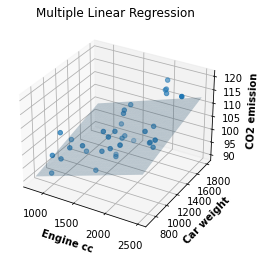

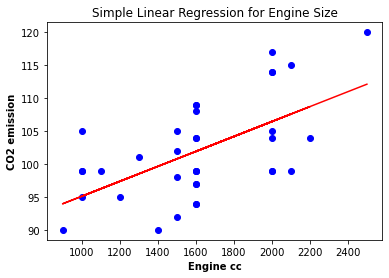

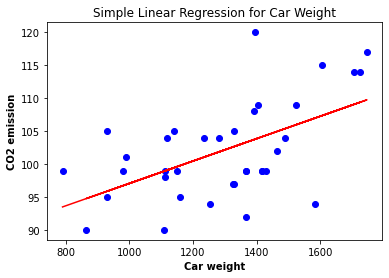

Multiple Linear Regression Coefficients:
Beta0 (Intercept): 79.69471929115917
Beta1 (Engine cc): 0.007805257527747158
Beta2 (Car weight): 0.0075509472703009575


Simple Linear Regression Coefficients for Engine Size:
Beta0 (Intercept): 83.74643306756182
Beta1 (Engine cc): 0.011347041544272022


Simple Linear Regression Coefficients for Car Weight:
Beta0 (Intercept): 80.05939852445603
Beta1 (Car weight): 0.016999734601254566
Multiple Linear Regression Error:
Error Vector (ε): [  5.53477484  -2.82012716   0.48519317  -3.25102045   4.98931453
  10.48519317  -8.99608035  -9.70964861  -1.79925895  -1.8667207
   3.3195691    3.68300813   3.10336982  -7.63691732  -5.19568742
  -5.22589121  -3.49017436  -2.53149836   3.36735867  -0.33289232
 -10.14383181  -7.08798705  -7.39280312  -3.86772172  -6.98982473
  -0.46474333  -2.55614578   5.66938161   5.31677597   5.82040056
   6.79496953   8.51081172   2.49144879   5.32105196   6.20778775
  10.25856545]
Minimum Square Error (||ε||): 34.82212623660

In [10]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import linalg

headers = ["Car","Model","Engine cc","Car weight","CO2 emission"]
carData = []   # will list of 36 car information lists

with open('data.csv', 'r') as csvfile:  # open data.csv for reading 
    csvreader = csv.reader(csvfile)
    next(csvreader)                     # skip data headers
    for row in csvreader:               # extract data rows one by one
        carData.append(row)             # carData[i] = i-th car info
data = np.array(carData)                # convert carData list into array 

# Multiple Linear Regression
# take the measurements x1 = Engine cc, x2 = Car weight
temp = np.array(data[:, 2:4], dtype=int)
# take the measurements y = CO2 emission (dependent variable)
Y = np.array(data[:, 4], dtype=int)
# X[i] = [1, x1, x2]
X = np.concatenate((np.ones((36, 1), dtype=int), temp), axis=1)

# Calculate regression coefficients [β0, β1, β2] = (X^T*X)^(-1)*X^T*Y
varX = np.matmul(X.transpose(), X)       # sxx = X^T * X
temp = np.linalg.inv(varX)              # (X^T * X)^(-1)
temp = np.matmul(temp, X.transpose())    # (X^T * X)^(-1) * X^T
beta = np.matmul(temp, Y)                # (X^T * X)^(-1) * X^T * Y

# 3D plot for Multiple Linear Regression
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 1], X[:, 2], Y, 'green')
ax.set_xlabel('Engine cc', fontweight='bold')
ax.set_ylabel('Car weight', fontweight='bold')
ax.set_zlabel('CO2 emission', fontweight='bold')

xx1 = np.outer(np.linspace(800, 2500, 32), np.ones(32))
xx2 = np.outer(np.ones(32), np.linspace(700, 1800, 32))
yy = (beta[0] + beta[1] * xx1 + beta[2] * xx2)
ax.plot_surface(xx1, xx2, yy, alpha=0.25)

plt.title('Multiple Linear Regression')
plt.show()

# Simple Linear Regression for Engine Size (X1)
X1 = np.concatenate((np.ones((36, 1), dtype=int), np.array(data[:, 2], dtype=int).reshape(-1, 1)), axis=1)
varX1 = np.matmul(X1.transpose(), X1)
temp1 = np.linalg.inv(varX1)
temp1 = np.matmul(temp1, X1.transpose())
beta1 = np.matmul(temp1, Y)

# Simple Linear Regression for Car Weight (X2)
X2 = np.concatenate((np.ones((36, 1), dtype=int), np.array(data[:, 3], dtype=int).reshape(-1, 1)), axis=1)
varX2 = np.matmul(X2.transpose(), X2)
temp2 = np.linalg.inv(varX2)
temp2 = np.matmul(temp2, X2.transpose())
beta2 = np.matmul(temp2, Y)

# 2D plot for Simple Linear Regression for Engine Size (X1)
plt.scatter(X1[:, 1], Y, color='blue')
plt.plot(X1[:, 1], beta1[0] + beta1[1] * X1[:, 1], color='red')
plt.xlabel('Engine cc', fontweight='bold')
plt.ylabel('CO2 emission', fontweight='bold')
plt.title('Simple Linear Regression for Engine Size')
plt.show()

# 2D plot for Simple Linear Regression for Car Weight (X2)
plt.scatter(X2[:, 1], Y, color='blue')
plt.plot(X2[:, 1], beta2[0] + beta2[1] * X2[:, 1], color='red')
plt.xlabel('Car weight', fontweight='bold')
plt.ylabel('CO2 emission', fontweight='bold')
plt.title('Simple Linear Regression for Car Weight')
plt.show()

# Print coefficients for Multiple Linear Regression
print("Multiple Linear Regression Coefficients:")
print(f"Beta0 (Intercept): {beta[0]}")
print(f"Beta1 (Engine cc): {beta[1]}")
print(f"Beta2 (Car weight): {beta[2]}")
print("\n")

# Print coefficients for Simple Linear Regression for Engine Size (X1)
print("Simple Linear Regression Coefficients for Engine Size:")
print(f"Beta0 (Intercept): {beta1[0]}")
print(f"Beta1 (Engine cc): {beta1[1]}")
print("\n")

# Print coefficients for Simple Linear Regression for Car Weight (X2)
print("Simple Linear Regression Coefficients for Car Weight:")
print(f"Beta0 (Intercept): {beta2[0]}")
print(f"Beta1 (Car weight): {beta2[1]}")

# Calculate error vector for Multiple Linear Regression
error_multilinear = Y - (beta[0] + beta[1]*X[:, 1] + beta[2]*X[:, 2])

# Calculate minimum square error for Multiple Linear Regression
min_square_error_multilinear = np.linalg.norm(error_multilinear)

print("Multiple Linear Regression Error:")
print("Error Vector (ε):", error_multilinear)
print(f"Minimum Square Error (||ε||): {min_square_error_multilinear}")
print("\n")

# Calculate error vector for Simple Linear Regression for Engine Size (X1)
error_simple_engine_size = Y - (beta1[0] + beta1[1] * X1[:, 1])

# Calculate minimum square error for Simple Linear Regression for Engine Size (X1)
min_square_error_simple_engine_size = np.linalg.norm(error_simple_engine_size)

print("Simple Linear Regression Error for Engine Size:")
print("Error Vector (ε):", error_simple_engine_size)
print(f"Minimum Square Error (||ε||): {min_square_error_simple_engine_size}")
print("\n")

# Calculate error vector for Simple Linear Regression for Car Weight (X2)
error_simple_car_weight = Y - (beta2[0] + beta2[1] * X2[:, 1])

# Calculate minimum square error for Simple Linear Regression for Car Weight (X2)
min_square_error_simple_car_weight = np.linalg.norm(error_simple_car_weight)

print("Simple Linear Regression Error for Car Weight:")
print("Error Vector (ε):", error_simple_car_weight)
print(f"Minimum Square Error (||ε||): {min_square_error_simple_car_weight}")

